In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import functools
from collections import Counter
import math
import statistics

import seaborn as sns
import matplotlib.lines as mlines
import os
from IPython.display import display
import scipy.stats as st

import matplotlib.image as mpimg

from scipy.stats import norm

# Comparison of scores

In [2]:
rank = pd.read_csv('./study_data/score/城市信息+排名得分综合表.csv')
fontdict = {'weight': 600, 'size':12}

In [3]:
def show_box(score_indexs, title):
    score_indexs_arr = []
    for i in score_indexs:
        score_indexs_arr.append([i, statistics.mean(rank[i]), statistics.median(rank[i])])
    display(pd.DataFrame(score_indexs_arr, columns=['指标项', '平均数', '中位数']))

    # 箱线图
    box_data = []
    for i in score_indexs:
        for j in list(rank[i]):
            box_data.append([i, j])
    df_box_data = pd.DataFrame(box_data, columns=['score_type', 'score'])
    boxprops = {'linewidth': 1, 'facecolor': 'white'}
    ax = sns.boxplot(data=df_box_data, y='score', x='score_type', color="#ED6168", linewidth=.8, 
                flierprops={'marker': 'o', 'markersize': 5, 'markerfacecolor': 'white'},
                boxprops=boxprops)

    ax.set_xlabel('Fusion Method', fontdict=fontdict)
    ax.set_ylabel('Score', fontdict=fontdict)
    ax.set_title(title)
    
    ax.figure.savefig('./study_data/figs/CII_boxplot' + title + '.pdf', 
                                  dpi=600, bbox_inches = 'tight')

,指标项,平均数,中位数
0,ARI,29.577594,25.479058


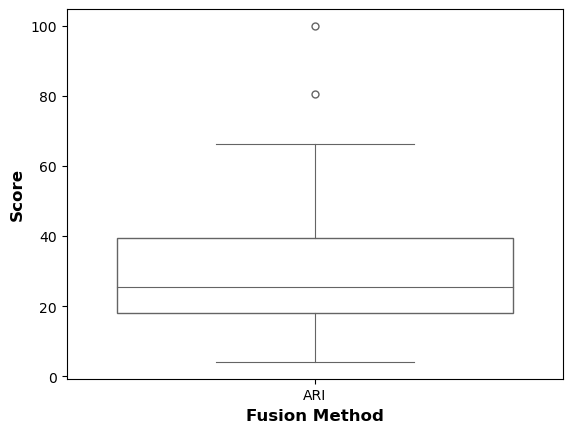

In [4]:
show_box(['ARI'], '')

# CII score distribution

In [5]:
def show_score_distribution(score_type):
    COLOR  = '#177939' 
    LINE_COLOR = '#ED6168'

    ax1 = sns.histplot(rank, x=score_type, color=COLOR, bins=30, legend=False, kde=True)
    ax1.lines[0].set_color(LINE_COLOR)
    ax1.set_xlabel('Score', fontdict=fontdict)
    ax1.set_ylabel('Number of Cities', fontdict=fontdict)
    sns.despine()
    ax1.figure.savefig('./study_data/figs/CII_' + score_type + '_distribution.pdf', dpi=600, bbox_inches = 'tight')

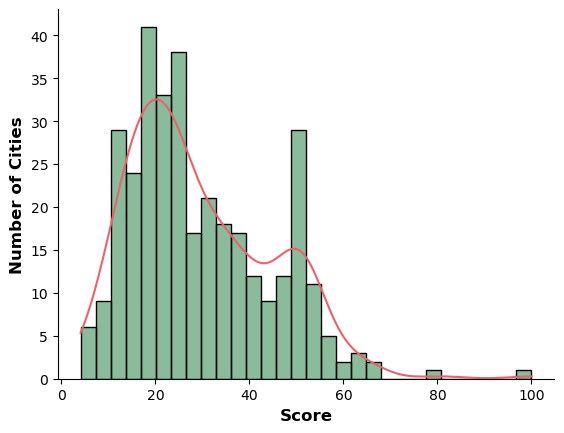

In [6]:
show_score_distribution('ARI')

# CII vs GCI

In [8]:
# %load utils/cii_gci_plt.py
rank = pd.read_csv('./study_data/score/城市信息+排名得分综合表.csv')

# 国际知名机构科尔尼管理咨询公司发布《2023年全球城市指数报告》
# https://www.kearney.cn/
# 因为我们数据中只有台湾一个整体，为了方便对比，这里将台北和高雄合并成台湾，按照最高排名排序
right_30 = [['Beijing', 1], ['Hong Kong', 2], ['Shanghai', 3], ['Guangzhou', 4], 
          ['Shenzhen', 5], ['Hangzhou', 6], ['Chengdu',7], ['Nanjing', 8], ['Wuhan', 9], 
            ['Tianjin', 10], ['Taiwan', 11], ['Xi\'an', 12], ['Suzhou', 13], ['Changsha', 14], ['Chongqing', 15], 
        ['Qingdao', 16], ['Zhengzhou', 17], ['Jinan', 18], ['Ningbo', 19], ['Dalian', 20], 
        ['Shenyang', 21], ['Harbin', 22], ['Hefei', 23], ['Kunming', 24], ['Wuxi', 25], 
        ['Foshan', 26], ['Quanzhou', 27], ['Yantai', 28], ['Dongguan', 29], ['Tangshan', 30]]


right_20 = [['Beijing', 1], ['Hong Kong', 2], ['Shanghai', 3], ['Guangzhou', 4], 
          ['Shenzhen', 5], ['Hangzhou', 6], ['Chengdu',7], ['Nanjing', 8], ['Wuhan', 9], 
            ['Tianjin', 10], ['Taiwan', 11], ['Xi\'an', 12], ['Suzhou', 13], ['Changsha', 14], ['Chongqing', 15], 
        ['Qingdao', 16], ['Zhengzhou', 17], ['Jinan', 18], ['Ningbo', 19], ['Dalian', 20]]



right_10 = [['Beijing', 1], ['Hong Kong', 2], ['Shanghai', 3], ['Guangzhou', 4], 
          ['Shenzhen', 5], ['Hangzhou', 6], ['Chengdu',7], ['Nanjing', 8], ['Wuhan', 9], 
            ['Tianjin', 10]]
# 绘制对比图
# score_type 计算分数的类型
def show_slope(score_type, right_data, show_pic=True):
    TOP_NUMBER = len(right_data)
    right = right_data
    df_left = rank.sort_values(by=score_type, ascending=False)
    df_left.reset_index(drop=True)
    df_left = df_left[0:TOP_NUMBER]
    left = df_left[['en_name', score_type]].values
    
    COLOR  = '#ED6168'
    # 生成数据
    def gen_slope_data(left, right, left_x, right_y):
        max_high = len(left) * 2 

        left_data = []
        right_data = []
        for i in range(len(left)):
            tx_left = left[i][0]
            tx_right = right[i][0]
            va = left[i][1]

            point_pos_y = max_high - i * 2 - 0.5
            text_pos_y = max_high - 0.5 - i * 2

            left_data.append({
                'p_pos': (left_x, point_pos_y),
                't_pos': (left_x - 0.2, text_pos_y),
                'text': tx_left
            })
            right_data.append({
                'p_pos': (right_y, point_pos_y),
                't_pos': (right_y + 0.2, text_pos_y),
                'text': tx_right
            })
        return {
            'left_data': left_data,
            'right_data': right_data
        }

    # 绘制点和文本
    def draw_slope_point(slope_data, color=COLOR):
        left = slope_data['left_data']
        right = slope_data['right_data']
        for i in left:
            ax.scatter(x=i['p_pos'][0], y=i['p_pos'][1], c=color, zorder=100)
            ax.text(x=i['t_pos'][0] , y=i['t_pos'][1], s=i['text'], 
                    horizontalalignment='right', verticalalignment='center', fontdict={'size':10})

        for i in right:
            ax.scatter(x=i['p_pos'][0], y=i['p_pos'][1], c=color, zorder=100)
            ax.text(x=i['t_pos'][0] , y=i['t_pos'][1], s=i['text'], 
                    horizontalalignment='left', verticalalignment='center', fontdict={'size':10})

    def add_line(p1, p2, color=COLOR):
        ax = plt.gca()
        line = mlines.Line2D([p1[0], p2[0]], [p1[1], p2[1]], color=color)
        ax.add_line(line)
        return line

    # 绘制连线
    def draw_line(slope_data):
        left = slope_data['left_data']
        right = slope_data['right_data']
        for i in left:
            source_name = i['text']
            for j in right:
                target_name = j['text']
                if source_name == target_name:
                    p1 = [i['p_pos'][0], i['p_pos'][1]]
                    p2 = [j['p_pos'][0], j['p_pos'][1]]
                    add_line(p1, p2)
                    
    if show_pic:
        # 绘图配置
        START_LINE_X = 1.2
        START_LINE_Y = 3.5
        fig, ax = plt.subplots(1, 1, figsize=(5, 7))
        ax.vlines(x=START_LINE_X, ymin=0, ymax=len(left)*2 + 0.5, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
        ax.vlines(x=START_LINE_Y, ymin=0, ymax=len(left)*2 + 0.5, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
        ax.set(xlim=(0, 5), ylim=(0, len(left)*2 + 4))
        ax.axis('off')

        ax.text(x=START_LINE_X - 0.2, y=len(left)*2 + 2, s='CII Ranking (ours)', 
                horizontalalignment='right', fontdict={'weight': 600, 'size':12})
        ax.text(x=START_LINE_Y + 0.2, y=len(left)*2 + 2, s='GCI Ranking', fontdict={'weight': 600, 'size':12})


        slope_data = gen_slope_data(left, right, left_x=START_LINE_X, right_y=START_LINE_Y)
        draw_line(slope_data)
        draw_slope_point(slope_data)

        fig.savefig('./study_data/figs/CII_GCI_Ranking_top_' + str(TOP_NUMBER) + '_' + score_type + '.pdf', dpi=600, bbox_inches = 'tight')
    
    # ////////////////////算法衡量///////////////////////
    our_top = list(df_left['en_name'])
    same = []
    for i in right:
        name = i[0]
        for j in our_top:
            if name == j:
                same.append(i)


    
    # 两个榜单相同的城市排位差
    ranking_diff_sum = []
    for i in same:
        city_en_name = i[0]
        city_ranking = i[1]
        our_ranking = our_top.index(city_en_name) + 1
        diff = abs(our_ranking - city_ranking)
        ranking_diff_sum.append(diff)
 
    ranking_rate = round(sum(ranking_diff_sum)/ len(ranking_diff_sum), 2)
    return [score_type, TOP_NUMBER, len(same), round(len(same)/len(right), 2)]


['ARI', 20, 18, 0.9]

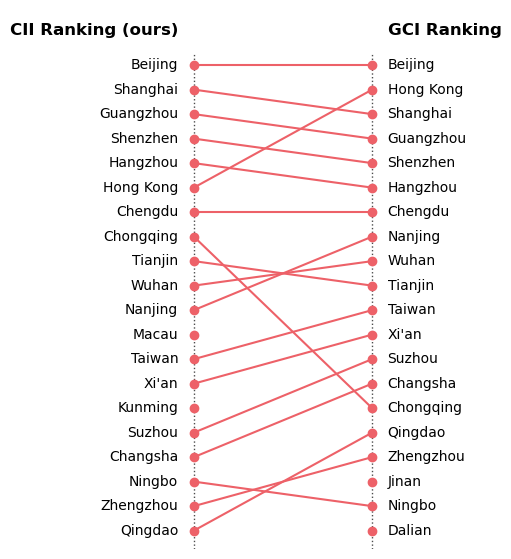

In [10]:
show_slope('ARI', right_20, show_pic=True)

['ARI', 30, 25, 0.83]

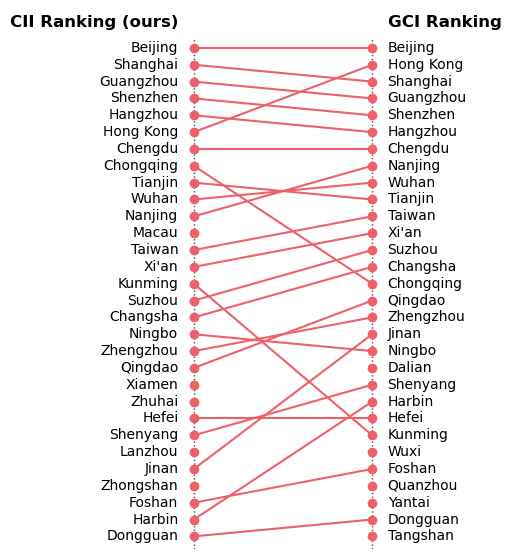

In [11]:
show_slope('ARI', right_30, show_pic=True)